# Импорт библиотек

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [6]:
data = pd.read_csv('data/sales.csv').rename(columns={"date": "Дата",
                                                     "item_price": "Цена",
                                                     "item_cnt_day": "Количество",
                                                     "item_name": "Товар",
                                                     "item_category_name": "Категория",
                                                     "shop_name": "Магазин"})

In [7]:
data.head()

,Дата,Цена,Количество,Товар,Категория,Магазин
0,01.01.2013,1198.50,1.00,"Need for Speed The Run [PS3, русская версия]",Игры - PS3,"Химки ТЦ ""Мега"""
1,01.01.2013,263.00,1.00,МАДАГАСКАР 3,Кино - DVD,"Казань ТЦ ""Бехетле"""
2,01.01.2013,899.00,1.00,"God of War 3 (Essentials) [PS3, русская версия]",Игры - PS3,"Калуга ТРЦ ""XXI век"""
3,01.01.2013,1599.00,1.00,Фигурка Assassin's Creed Revelations Ezio Audi...,Подарки - Фигурки,"Химки ТЦ ""Мега"""
4,01.01.2013,399.00,1.00,ABBA The Definitive Collection DVD,Музыка - Музыкальное видео,"Москва ТЦ ""МЕГА Теплый Стан"" II"


# Расчет статических характеристик данных
### Расчет статистических характеристик проводится только для числовых признаков

###### Рассчитываемые характеристики:
1. ***Медиана данных - некоторе число, такое, что половина значенийвыборки больше него, а половина меньше***
2. ***Мода данных - значение признака, встречающееся чаще других***
3. ***Среднее значение***
4. ***Перцентили (квантили) - значение, которое заданная случайная величина не превышает с фиксированной вероятностью***
5. ***Стандартное отклонение***
6. ***Минимальное и максимальное значения***
7. ***Число пропущенных и уникальных значений***

In [8]:
def describe_data(data, columns_to_review):
    result_dataframe = pd.DataFrame(columns=columns_to_review, index=["median","mode", "mean", "25%", "50%", "75%", "std",
                                                                      "max", "min", "cnt_nan", "cnt_unique"])
    for column in columns_to_review:
        median_value = data[column].median()
        mode_value = list(dict(data[column].value_counts()).keys())[0]
        mean_value = data[column].mean()
        quantile_25 = data[column].quantile(0.25)
        quantile_50 = data[column].quantile(0.5)
        quantile_75 = data[column].quantile(0.75)
        std_value = data[column].std()
        max_value = data[column].max()
        min_value = data[column].min()
        count_nan = data[column].isnull().sum()
        count_unique = data[column].unique().__len__()
        
        result_dataframe[column] = [median_value, mode_value, mean_value, quantile_25, quantile_50, quantile_75,
                                    std_value, max_value, min_value, count_nan, count_unique]
    
    return result_dataframe

In [9]:
describe_data(data, ["Цена", "Количество"])

,Цена,Количество
median,399.00,1.00
mode,299.00,1.00
mean,890.85,1.24
25%,249.00,1.00
50%,399.00,1.00
75%,999.00,1.00
std,1729.80,2.62
max,307980.00,2169.00
min,-1.00,-22.00
cnt_nan,0.00,0.00


# Визуализация признаков

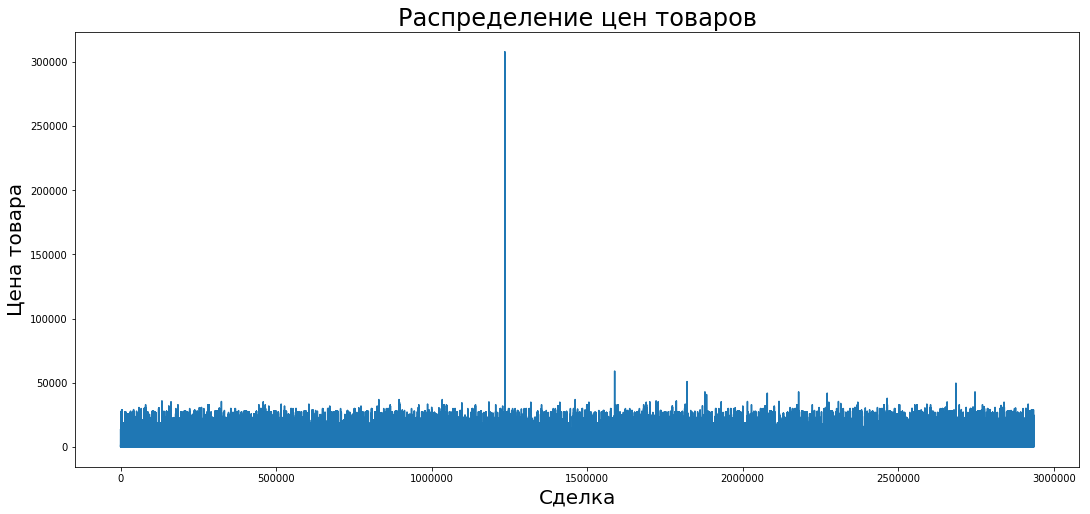

In [10]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Цена товара", fontsize=20)
plt.title("Распределение цен товаров", fontsize=24)
plt.plot(data.Цена)

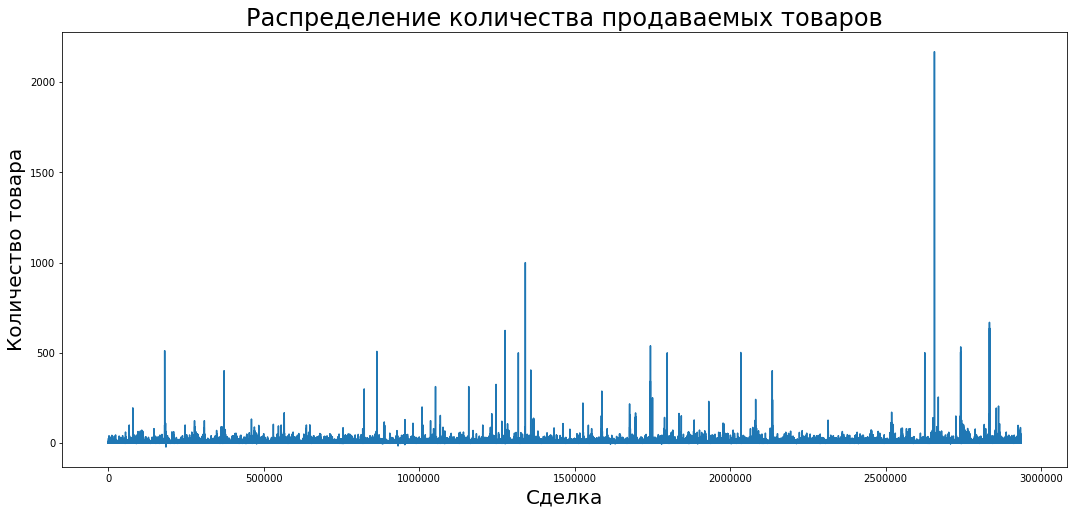

In [11]:
plt.figure(figsize=(18, 8))
plt.xlabel("Сделка", fontsize=20)
plt.ylabel("Количество товара", fontsize=20)
plt.title("Распределение количества продаваемых товаров", fontsize=24)
plt.plot(data.Количество)

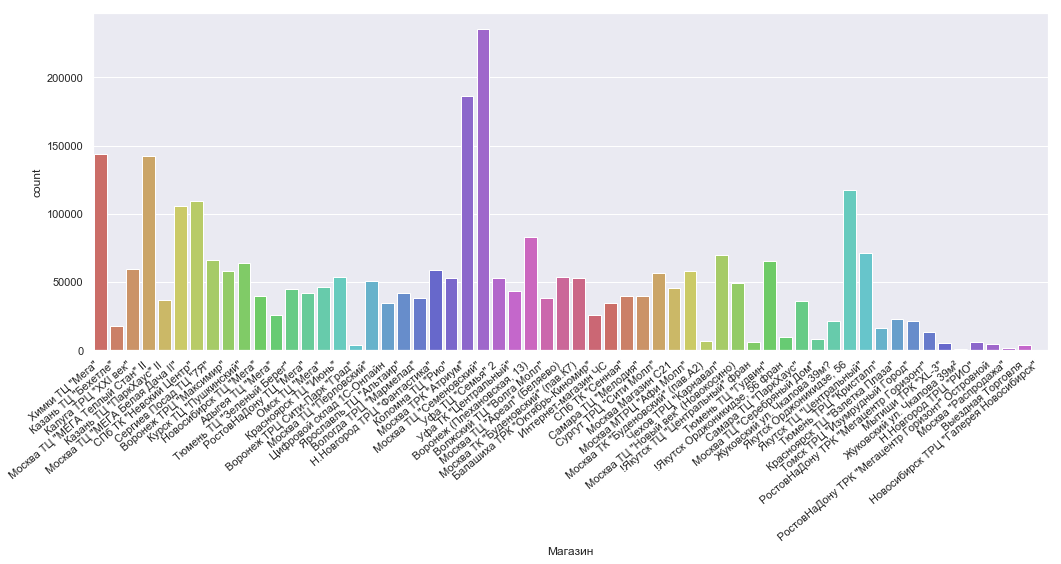

In [12]:
color = sns.color_palette("hls", 32)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=data['Магазин'], data=data, palette=color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

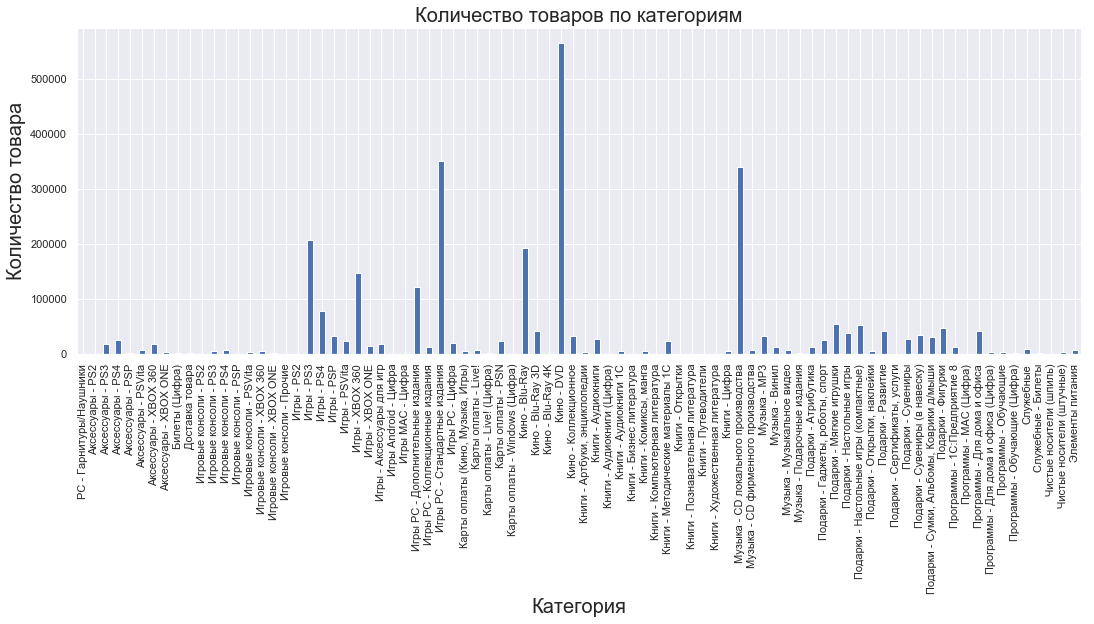

In [13]:
plt.figure(figsize=(18,6))
data.groupby('Категория')['Товар'].count().plot.bar()
plt.title("Количество товаров по категориям", fontsize=20)
plt.ylabel('Количество товара', fontsize=20)
plt.xlabel('Категория', fontsize=20)
plt.show()

In [39]:
data.Магазин.value_counts()[:2]

Москва ТЦ "Семеновский"    235636
Москва ТРК "Атриум"        186104
Name: Магазин, dtype: int64

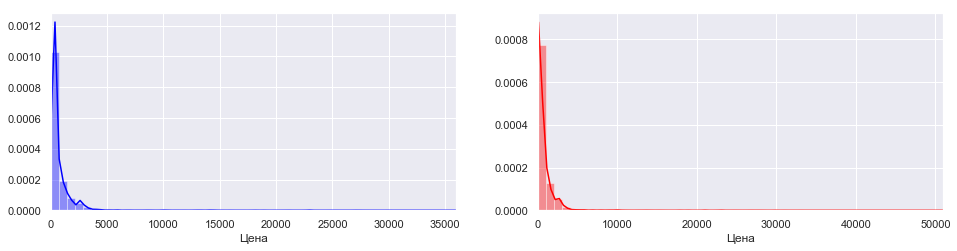

In [41]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(16, 8))

df = data[data.Магазин=='Москва ТЦ "Семеновский"']
plt.subplot(2,2,1)
plt.xlim(df.Цена.min(), df.Цена.max())
sns.distplot(df.Цена, label='РАспределение', color='blue')

df = data[data.Магазин=='Москва ТРК "Атриум"']
plt.subplot(2,2,2)
plt.xlim(df.Цена.min(), df.Цена.max())
sns.distplot(df.Цена, label='Цена', color='red')